In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Lambda,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf




In [ ]:
def softmax(x):
  exp_z = np.exp(x-np.max(x))
  return exp_z/np.sum(exp_z)

In [ ]:
def rnn_next_forward(x,a_prev,parameters_tmp):

  Wax = parameters_tmp["Wax"]
  Waa = parameters_tmp["Waa"]
  Wya = parameters_tmp["Wya"]
  ba = parameters_tmp["ba"]
  by = parameters_tmp["by"]

  a_next = tf.tanh(np.dot(Waa,a_prev)+ np.dot(Wax,x)  + ba)
  yt_pred = softmax(np.dot(Wya,a_next) + by)

  return a_next, yt_pred


In [ ]:
np.random.seed(1)
x = np.random.randn(100,10)
a_prev = np.random.randn(64,10)

parameters_tmp = {}

parameters_tmp["Waa"] = np.random.randn(64,64)
parameters_tmp["Wax"] = np.random.randn(64,100)
parameters_tmp["Wya"] = np.random.randn(2,64)
parameters_tmp["ba"] =np.random.randn(64,1)
parameters_tmp["by"] = np.random.randn(2,1)

a_next,yt_pred=rnn_next_forward(x,a_prev,parameters_tmp)
print("a_next[4] = \n", a_next[4])
print("a_next.shape = \n", a_next.shape)
print("yt_pred[1] =\n", yt_pred[1])
print("yt_pred.shape = \n", yt_pred.shape)





a_next[4] = 
 tf.Tensor(
[ 1.         -0.93432705  1.          0.99999978 -1.         -0.99999896
  1.          0.99999962  0.99991852  0.99999991], shape=(10,), dtype=float64)
a_next.shape = 
 (64, 10)
yt_pred[1] =
 [4.88142143e-01 7.62901968e-08 4.11621561e-08 4.15884962e-07
 5.44060510e-10 2.19234056e-04 2.25777003e-03 2.15649520e-09
 1.99242841e-08 9.46640447e-12]
yt_pred.shape = 
 (2, 10)


# For multiple times

In [ ]:
def rnn_forward(x,a0,parameters_tmp):

  n_x,m,T_x= x.shape

  n_y,n_a = parameters_tmp["Wya"].shape
  a = np.zeros((n_a,m,T_x))
  y_pred = np.zeros((n_y,m,T_x))
  a_next = a0

  for t in range(T_x):
   a_next,yt_pred = rnn_next_forward(x[:,:,t],a_next,parameters_tmp)
   a[:,:,t] = a_next
   y_pred[:,:,t] =yt_pred


  return a,y_pred



In [ ]:
np.random.seed(1)
x = np.random.randn(4,10,5)
a_prev = np.random.randn(5,10)

parameters_tmp = {}

parameters_tmp["Waa"] = np.random.randn(5,5)
parameters_tmp["Wax"] = np.random.randn(5,4)
parameters_tmp["Wya"] = np.random.randn(2,5)
parameters_tmp["ba"] =np.random.randn(5,1)
parameters_tmp["by"] = np.random.randn(2,1)

a_next,yt_pred=rnn_forward(x,a_prev,parameters_tmp)
print("a_next[4][1] = \n", a_next[4][1])
print("a_next.shape = \n", a_next.shape)
print("yt_pred[1][1] =\n", yt_pred[1][1])
print("yt_pred.shape = \n", yt_pred.shape)





a_next[4][1] = 
 [-0.68447666 -0.58911316  0.97167612 -0.98897273  0.26892699]
a_next.shape = 
 (5, 10, 5)
yt_pred[1][1] =
 [0.17759562 0.01538726 0.00134349 0.15731733 0.00174775]
yt_pred.shape = 
 (2, 10, 5)


In [ ]:
from google.colab import files

# Upload files (can select multiple)
uploaded = files.upload()  # You can select multiple files in the dialog

# uploaded is a dictionary: {filename: filedata}
file_names = list(uploaded.keys())
print(f"Uploaded files: {file_names}")


Saving amazon_cells_labelled.txt to amazon_cells_labelled (2).txt
Saving imdb_labelled.txt to imdb_labelled (2).txt
Uploaded files: ['amazon_cells_labelled (2).txt', 'imdb_labelled (2).txt']


In [ ]:
def extract_amazon_data_from_files(file_list):
    all_sentences = []
    all_labels = []

    for file_name in file_list:
        with open(file_name, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                if line and '\t' in line:
                    parts = line.split('\t')
                    if len(parts) >= 2:
                        sentence = parts[0].strip()
                        label = parts[-1].strip()
                        try:
                            all_labels.append(int(label))
                            all_sentences.append(sentence)
                        except ValueError:
                            continue
    return all_sentences, all_labels

sentences, labels = extract_amazon_data_from_files(file_names

                                                   )

print(f"✅ Total sentences loaded: {len(sentences)}")
print(f"👍 Positive reviews: {sum(labels)}")
print(f"👎 Negative reviews: {len(labels) - sum(labels)}")


✅ Total sentences loaded: 2000
👍 Positive reviews: 1000
👎 Negative reviews: 1000


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.translate.nist_score import sentence_nist
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

final_sentence = []


for word in sentences:
  review = re.sub('[^a-zA-Z]',' ',word)
  review = nltk.word_tokenize(review)
  review =[ps.stem(word) for word in review if  word not in stopwords.words('english')]
  review = ' '.join(review)
  final_sentence.append(review)




In [ ]:
print(final_sentence)

['so way plug us unless i go convert', 'good case excel valu', 'great jawbon', 'tie charger convers last minut major problem', 'the mic great', 'i jiggl plug get line right get decent volum', 'if sever dozen sever hundr contact imagin fun send one one', 'if razr owner must', 'needless say i wast money', 'what wast money time', 'and sound qualiti great', 'he impress go origin batteri extend batteri', 'if two seper mere ft i start notic excess static garbl sound headset', 'veri good qualiti though', 'the design odd ear clip comfort', 'highli recommend one blue tooth phone', 'i advis everyon do not be fool', 'so far so good', 'work great', 'it click place way make wonder long mechan would last', 'i went motorola websit follow direct could get pair', 'i bought use kindl fire absolut love', 'the commerci mislead', 'i yet run new batteri two bar three day without charg', 'i bought mother problem batteri', 'great pocket pc phone combin', 'i own phone month say best mobil phone i', 'i think in

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding

In [ ]:
vocab_size = len(set(final_sentence))+1
onehot_repr = [one_hot(word,vocab_size) for word in final_sentence]

print(onehot_repr)

[[199, 919, 588, 1021, 1699, 1218, 290, 1560], [1670, 969, 44, 1229], [1004, 706], [382, 112, 18, 469, 1903, 162, 310], [1273, 1858, 1004], [1218, 54, 588, 182, 1526, 1807, 182, 1601, 1384], [1589, 20, 1460, 20, 147, 818, 1639, 862, 745, 929, 929], [1589, 1229, 897, 1448], [577, 1463, 1218, 29, 938], [347, 29, 938, 1206], [13, 1355, 122, 1004], [445, 606, 290, 1331, 1788, 1420, 1788], [1589, 691, 1379, 1701, 67, 1218, 1148, 473, 335, 435, 33, 1355, 366], [263, 1670, 122, 575], [1273, 1679, 628, 404, 410, 1010], [748, 383, 929, 111, 1332, 295], [1218, 1745, 1907, 1444, 1595, 1300, 1634], [199, 151, 199, 1670], [1875, 1004], [1449, 322, 1773, 919, 101, 541, 1914, 1065, 658, 469], [1218, 1895, 1258, 1291, 495, 595, 1160, 182, 634], [1218, 984, 111, 980, 1881, 1409, 1285], [1273, 1873, 1676], [1218, 113, 1460, 1600, 1788, 691, 561, 1459, 912, 1475, 1661], [1218, 984, 773, 310, 1788], [1004, 141, 933, 295, 1091], [1218, 1652, 295, 342, 1463, 824, 582, 295, 1218], [1218, 389, 255, 66, 680], 

In [ ]:
word_length =15
embedded_docs = pad_sequences(onehot_repr,padding='post',maxlen=word_length)
print(embedded_docs.shape)

(2000, 15)


In [ ]:
# def create_model_rnn(vocab_size, embedding_dim=100, n_a=50, n_y=2, T_x=12):
#     """
#     Create RNN model for sentiment classification

#     Args:
#         vocab_size: Size of vocabulary
#         embedding_dim: Dimension of word embeddings (this becomes n_x)
#         n_a: Hidden state size
#         n_y: Number of output classes (2 for binary classification)
#         T_x: Sequence length
#     """
#     # Initialize parameters with correct dimensions
#     np.random.seed(1)
#     parameters_tmp = {}
#     parameters_tmp["Waa"] = np.random.randn(n_a, n_a) * 0.01
#     parameters_tmp["Wax"] = np.random.randn(n_a, embedding_dim) * 0.01  # n_x = embedding_dim
#     parameters_tmp["Wya"] = np.random.randn(n_y, n_a) * 0.01
#     parameters_tmp["ba"] = np.zeros((n_a, 1))
#     parameters_tmp["by"] = np.zeros((n_y, 1))

#     x_input = Input(shape=(T_x,), name='x_input')
#     a0_input = Input(shape=(n_a,), name='a0_input')

#     embedding_layer = Embedding(
#         input_dim=vocab_size,
#         output_dim=embedding_dim,
#         input_length=T_x,
#         name='embedding_layer'
#     )

#     x_embedded = embedding_layer(x_input)

#     def rnn_lambda(inputs):
#         x_embedded, a0 = inputs

#         # x_embedded shape: (batch_size, T_x, embedding_dim)
#         # Need: (embedding_dim, batch_size, T_x)
#         x_transposed = tf.transpose(x_embedded, [2, 0, 1])

#         # Use tf.numpy_function (newer API) instead of tf.py_function
#         def numpy_rnn_forward(x_np, a0_np):
#             # Convert to numpy
#             x_np = x_np.numpy() if hasattr(x_np, 'numpy') else x_np
#             a0_np = a0_np.numpy() if hasattr(a0_np, 'numpy') else a0_np

#             # Call your RNN function
#             a_output, y_pred_output = rnn_forward(x_np, a0_np, parameters_tmp)

#             return a_output.astype(np.float32), y_pred_output.astype(np.float32)

#         a_output, y_pred_output = tf.numpy_function(
#             func=numpy_rnn_forward,
#             inp=[x_transposed, a0],
#             Tout=[tf.float32, tf.float32]
#         )

#         # Set shapes explicitly
#         a_output.set_shape([n_a, None, T_x])
#         y_pred_output.set_shape([n_y, None, T_x])

#         # Convert back to Keras format: (batch_size, n_y, T_x)
#         y_pred_output_tf = tf.transpose(y_pred_output, [1, 0, 2])

#         # Take the last timestep's prediction: (batch_size, n_y)
#         y_last = y_pred_output_tf[:, :, -1]

#         return y_last

#     # RNN already outputs softmax probabilities
#     output = Lambda(rnn_lambda, name='rnn_output')([x_embedded, a0_input])

#     model = Model(
#         inputs=[x_input, a0_input],
#         outputs=output,
#         name='rnn_model'
#     )

#     return model, n_a, n_y, parameters_tmp


In [ ]:
import numpy as np



In [ ]:
max_len = max(len(sentences.split()) for sentences in final_sentence)
print(max_len)

45


In [ ]:
from tensorflow.keras.layers import SimpleRNN, Dropout

embedding_dim =100
max_len =15
input = Input(shape=(max_len,))
embedding = Embedding(input_dim = vocab_size,output_dim=embedding_dim,input_length = max_len)(input)
x = SimpleRNN(units=100,activation='relu')(embedding)
x= Dropout(0.2)(x)
x= Dense(32,activation='relu')(x)
output = Dense(1,activation='sigmoid')(x)

model = Model(inputs=input,outputs=output)
opt = Adam(learning_rate = 0.001,beta_1=0.9,beta_2=0.999,clipnorm=1.0)
model.compile(optimizer = opt,loss = 'binary_crossentropy',metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_5 (Embedding)         │ (None, 15, 100)        │       197,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220,465 (861.19 KB)

 Trainable params: 220,465 (861.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

from sklearn.model_selection import train_test_split

X_final=np.array(embedded_docs)
y_final=np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.4943 - loss: 0.6936 - val_accuracy: 0.5425 - val_loss: 0.6921
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5610 - loss: 0.6886 - val_accuracy: 0.4825 - val_loss: 0.6899
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6064 - loss: 0.6559 - val_accuracy: 0.6525 - val_loss: 0.6294
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7618 - loss: 0.5207 - val_accuracy: 0.7125 - val_loss: 0.5643
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8970 - loss: 0.3303 - val_accuracy: 0.7325 - val_loss: 0.8352
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9256 - loss: 0.2130 - val_accuracy: 0.7400 - val_loss: 0.8682
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9344 - loss: 0.1790 - val_accuracy: 0.7425 - val_loss: 0.8755
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9490 - loss: 0.1373 - val_accuracy: 0.7475 - v

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >0.7 ,1 ,0).ravel()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [ ]:
print(y_pred)

[1 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1
 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1
 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1
 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 1 1 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


In [ ]:
print(y_test)

[1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0
 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1
 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1
 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 1 0
 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0]


0.7476658907161273


/tmp/ipython-input-3893603661.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,1],[0,1],'k--',color ='red')


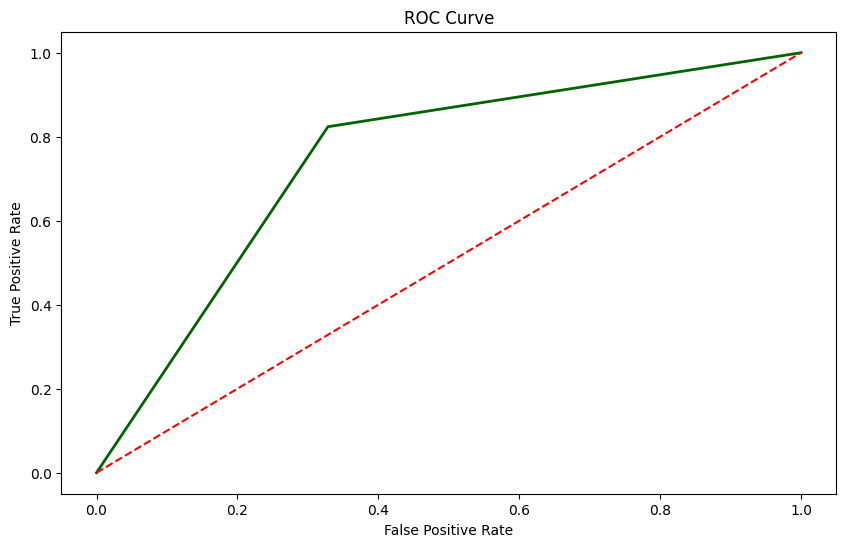

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve
from matplotlib import pyplot as plt
auc = roc_auc_score(y_test,y_pred)
print(auc)
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

plt.figure(figsize = (10,6))
plt.plot(fpr,tpr,color='darkgreen',lw = 2,label = f'ROC curve (AUC = {auc:.2f})')
plt.plot([0,1],[0,1],'k--',color ='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.show()


